## Tugas Kuis

Anggota Kelompok : 
1. I Made Rama Dwipa Raharja (230030278)
2. Kadek Febryanta (23003060?)

Note : Untuk tugas kuis ini kami sepakat untuk memilih poin 2

## A. Point Operations
Poitn operations adalah pengelolaan citra digital yang melibatkan manipulasi nilai intesitas pixel individual tanpa mempertimbangkan pixel tetangga. Operasi ini sering digunakan untuk meningkatkan kualitas citra, menyesuaikan kecerahan dan  contrast. Berikut dibawah ini merupakah kode untuk menerapkan Point Operations :


## Tahap Awal
ditahap ini kode kode dibawah ini bertujuan untuk membaca file citra yang dimasukan lalu mengubah file citra tersebut menjadi file citra grayscale(hitam putih) lalu membuat sebuah fungsi yang dengan nama show_image(), fungsi ini digunakan untuk menampilkan sebuah gambar.

**Tujuan:**
- Menyederhanakan data citra
- Memudahkan analisis histogram
- Sebagai referensi awal sebelum dilakukan operasi

**Karakteristik:**
- Menyederhanakan data menjadi satu channel intensitas
- Memberikan dasar analisis histogram yang jelas
- Mengoptimalkan pemrosesan untuk operasi berbasis intensitas

In [3]:
import cv2 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

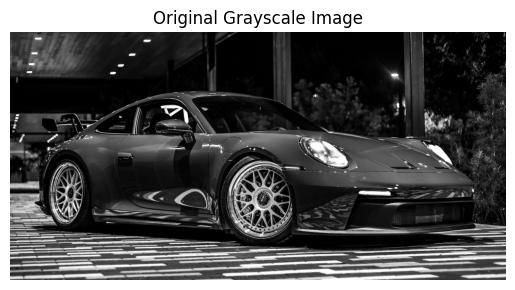

In [4]:
# Kode ini untuk membaca file dan
img = cv2.imread('Porche.jpg')

if img is None:
	raise FileNotFoundError("Gambar Tidak Ditemukan")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

In [5]:
# Membuat fungsi untuk menampilkan gambar
def show_image(image, title="Image"):
	plt.imshow(image, cmap='gray')
	plt.title(title)
	plt.axis('off')
	plt.show()

## 1. Brightened Adjustment
**Konsep:**
Kode berikut menerapkan operasi penyesuaian kecerahan (brightness adjustment) pada citra grayscale dengan menambahkan dan mengurangi nilai intensitas piksel secara konstan.


**Brightened**
- `bright = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=50)`
- Dengan meningkatkan kecerahan dengan menambahkan nilai konstan pada setiap piksel tanpa mengubah kontras.


**Darkened**
- `dark = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=-50)`
- Operasi ini menurunkan kecerahan dengan mengurangin nilai konstan pada setipa piksel tanpa mengubah kontras.


**Penjelasan Hasil Gambar**


Dari hasil gambar yang ditampilkan dapat kami simpulkan :

**Brightened:**
- Hasil File Citra body mobil terlihat sedikit gelap
- Hasil akurasi File Citra lebih tajam dan lebih berbentuk

**Darkned:**
- Hasil File Citra body mobil terlihat lebih gelap
- hasil File Citra cenderung kurang akurat dan kurang tajan

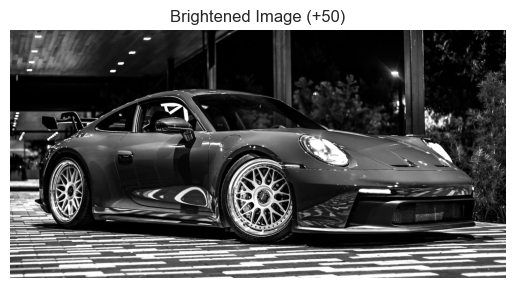

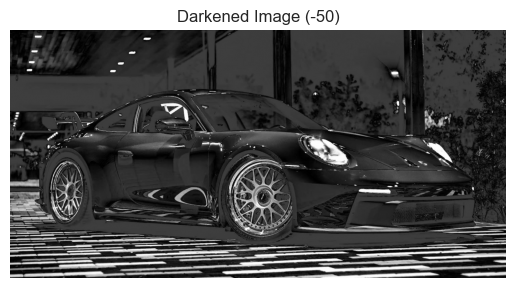

In [285]:
bright = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=50)
dark = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=-50)
show_image(bright, "Brightened Image (+50)")
show_image(dark, "Darkened Image (-50)")

## 2. Contast Adjustment
**Konsep:** Kode berikut menerapkan operasi titik (point operation) untuk mengubah kontras citra grayscale dengan memanipulasi nilai intensitas setiap piksel secara independen.

**Low Contrast**
- `low_contrast = cv2.convertScaleAbs(img_gray, alpha=0.5, beta=128)`
- Dengan menurunkan contrast maka akan menghasilkan perbedaan tidak terlalu jauh karna intensitas antara warna gelap dan terang menyemping yang menyebabkan perbedaan tersebut tidak terlihat.

**Normal Contrast**
- `normal_contrast = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=0)`
- Citra dipertahankan pada kondisi asli tanpa perubahan kontras maupun kecerahan.

**High Contrast**
- `high_contrast = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)`
- Operasi ini meningkatkan kontras dengan meningkatkan contrast yang mempelebar intesitas pixel terang maupun gelap pada citra, ini membuat gambar terlihat lebih tegas.


**Penjelasan Hasil Gambar**


Dari hasil output yang ditampilkan dapat kami simpulkan :


**Low Contrast:**
- warna pada File Citra lebih gelap.
- object object pada File Citra tidak terlihat jelas.

**Normal Contrast:**
- warna pada File Citra tidak berbeda jauh dengan low contrast.
- object object pada File Citra kurang terlihat jelas.

**High Contrast:**
- warna pada File Citra lebih terang.
- pada File Citra object object lebih terlihat jelas.

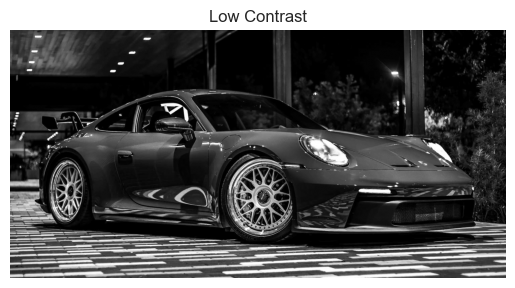

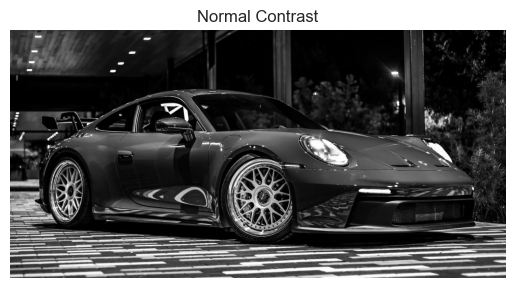

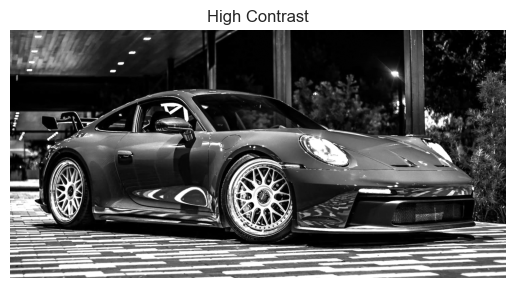

In [ ]:
low_contrast = cv2.convertScaleAbs(img_gray, alpha=0.5, beta=128)
normal_contrast = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=0)
high_contrast = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)
show_image(low_contrast, "Low Contrast")
show_image(normal_contrast, "Normal Contrast")
show_image(high_contrast, "High Contrast")

## 3. Mengubah File Citra menjadi negative (Inversion)
**Konsep:**
berbeda dengan hasil proses mengubah File Citra sebelumnya, gambar yang dihasilkan melalui proses inversion menjadi putih secara keseluruhan dengan nilai mendekati maksimum intensitas(255).

**Negative (Inversion):**
- Intensitas warna pixcel menjadi sangat tinggi (terang)
- Pada bagian yang memiliki warna terang sebelum dikonversi, berubah menjadi lebih gelap bisa dilihat pada File Citra yang terletak pada bagian lampu mobil

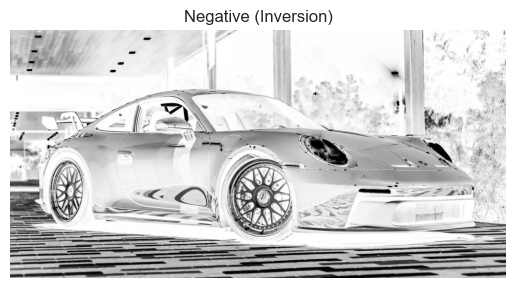

In [335]:
negative = 255 - img_gray
show_image(negative, "Negative (Inversion)")

## 4. Mengubah File Citra dengan proses Binary Tresholding
**Konsep:**
Dengan menggunakan proses Binary Tresholding, File Citra yang dihasilkan akan menjadi hitam karena piksel dengan intensitas lebih kecil dari 128 akan diubah menjadi hitam (0).

**Hasil Analisis File Citra Binary Tresholding:**
- Area dengan intensitas rendah berubah menjadi hitam dan berperan sebagai latar belakang, yang bisa dapat dilihat pada bagian body mobil dan backgroundnya.
- Citra biner yang dihasilkan menunjukkan pemisahan yang jelas antara area terang dan area gelap.
- Objek dengan intensitas tinggi pada citra grayscale awal direpresentasikan sebagai area putih, yang dapat dilihat pada area lantai, lampu mobil, dan velg.

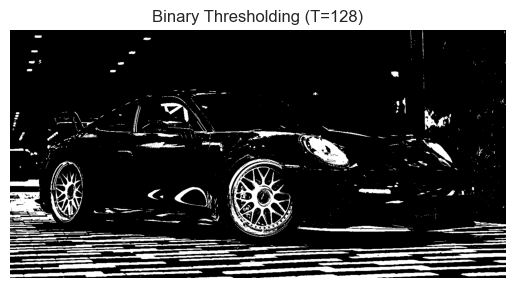

In [336]:
_, binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
show_image(binary, "Binary Thresholding (T=128)")

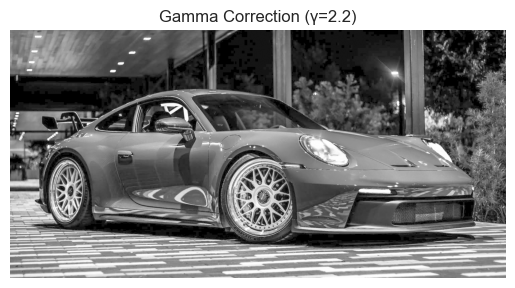

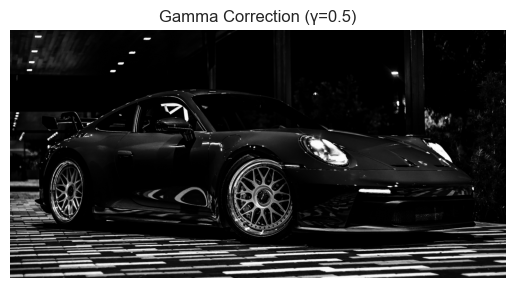

In [337]:
def gamma_correction(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([(i/255.0)**invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

gamma_dark = gamma_correction(img_gray, 2.2)   # gamma > 1 darkens
gamma_light = gamma_correction(img_gray, 0.5)  # gamma < 1 brightens

show_image(gamma_dark, "Gamma Correction (γ=2.2)")
show_image(gamma_light, "Gamma Correction (γ=0.5)")

## 5. Gamma Correction
**Konsep:** Terdapat dua gambar dengan value Gamma Correction yang berbeda beda. Gamma Correction ini berfungsi sebagai menyesuaikan tingkat kecerahan citra.

Perbedaan antara gambar 1 dengan gambar 2 yaitu : 

**Gambar 1 (y=2.2):**
- Gamma corection yang digunakan (y = 2.2) yang menghasilkan warna gambar menjadi lebih terang
- hasil yang diberikan lebih terlihat

**Gambar 2 (y=0.5):**
- Gamma Correction yang digunakan (y = 0.5) yang menghasilkan warna gambar menjadi lebih hitam
- hasil yang diberikan lebih hitam dan object object kurang terlihat dengan jelas

## Kode Dari file 04_filter.ipynb

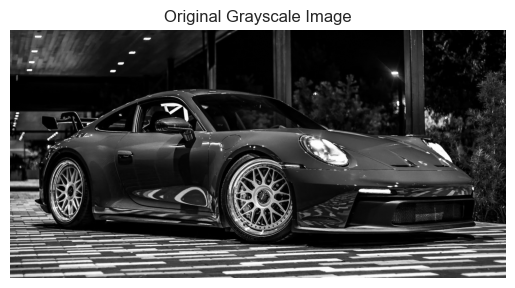

In [338]:
img = cv2.imread('Porche.jpg') # Adjust the path as necessary

if img is None:
	raise FileNotFoundError("Image file not found. Please check the path.")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()


1. MATRIX PIXEL INPUT (7x7):


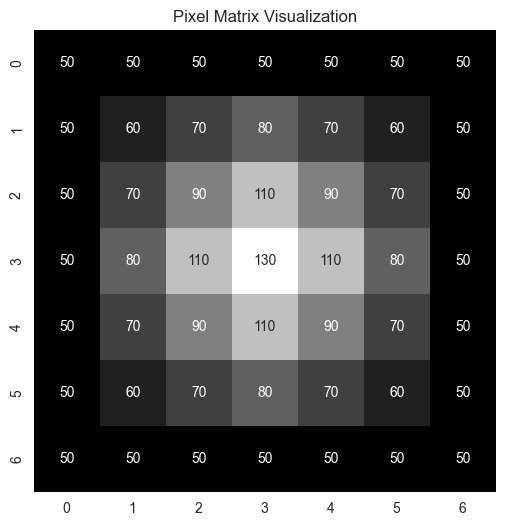

In [339]:
pixel_matrix = np.array([
    [50,  50,  50,  50,  50,  50,  50],
    [50,  60,  70,  80,  70,  60,  50],
    [50,  70,  90, 110,  90,  70,  50],
    [50,  80, 110, 130, 110,  80,  50],
    [50,  70,  90, 110,  90,  70,  50],
    [50,  60,  70,  80,  70,  60,  50],
    [50,  50,  50,  50,  50,  50,  50]
], dtype=np.float32)

print("\n1. MATRIX PIXEL INPUT (7x7):")

# Visualisasi matrix pixel
plt.figure(figsize=(6, 6))
sns.heatmap(pixel_matrix, annot=True, fmt=".0f", cmap="gray", cbar=False, square=True)
plt.title("Pixel Matrix Visualization")
plt.show()


2a. AVERAGE/BOX BLUR KERNEL (3x3):


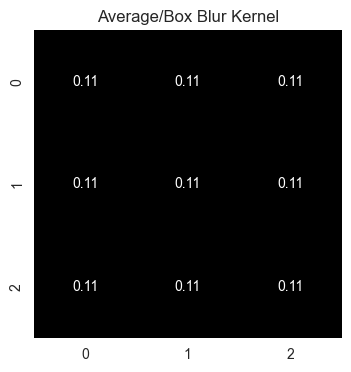

In [340]:
# 2. Definisikan berbagai kernel filter (3x3)
# a. Average/Box Blur Kernel
average_kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=np.float32) / 9

print("\n2a. AVERAGE/BOX BLUR KERNEL (3x3):")

# Visualisasi kernel
plt.figure(figsize=(4, 4))
sns.heatmap(average_kernel, annot=True, fmt=".2f", cmap="gray", cbar=False, square=True)
plt.title("Average/Box Blur Kernel")
plt.show()


Contoh Konvolusi pada Piksel Tengah [3, 3]:
Nilai Piksel Asli: 130

Region of Interest (ROI) 3x3:


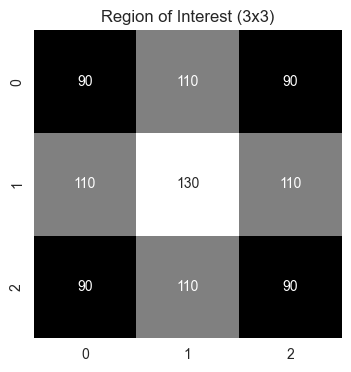

In [341]:
# Contoh detail konvolusi pada satu piksel (tengah matrix)
center_i, center_j = 3, 3
print(f"\nContoh Konvolusi pada Piksel Tengah [{center_i}, {center_j}]:")
print(f"Nilai Piksel Asli: {pixel_matrix[center_i, center_j]:.0f}")

# Ambil ROI 3x3 di sekitar piksel tengah
roi = pixel_matrix[center_i-1:center_i+2, center_j-1:center_j+2]
print(f"\nRegion of Interest (ROI) 3x3:")

# Visualisasi ROI
plt.figure(figsize=(4, 4))
sns.heatmap(roi, annot=True, fmt=".0f", cmap="gray", cbar=False, square=True)
plt.title("Region of Interest (3x3)")
plt.show()


Konvolusi dengan Average Kernel:
ROI × Kernel:


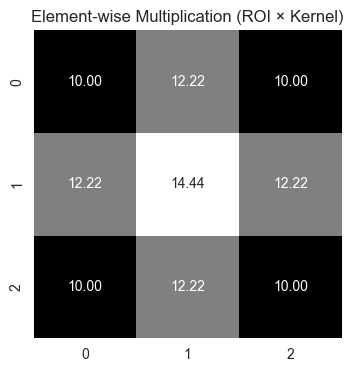

Sum (Hasil Konvolusi): 103.33


In [342]:
# Hitung konvolusi dengan Average Kernel
print(f"\nKonvolusi dengan Average Kernel:")
print("ROI × Kernel:")
element_wise = roi * average_kernel

# Visualisasi element-wise multiplication
plt.figure(figsize=(4, 4))
sns.heatmap(element_wise, annot=True, fmt=".2f", cmap="gray", cbar=False, square=True)
plt.title("Element-wise Multiplication (ROI × Kernel)")
plt.show()

result = np.sum(element_wise)
print(f"Sum (Hasil Konvolusi): {result:.2f}")


Ukuran Matrix Pixel: 7x7
Ukuran Kernel: 3x3
Padding yang Dibutuhkan: Height=1, Width=1


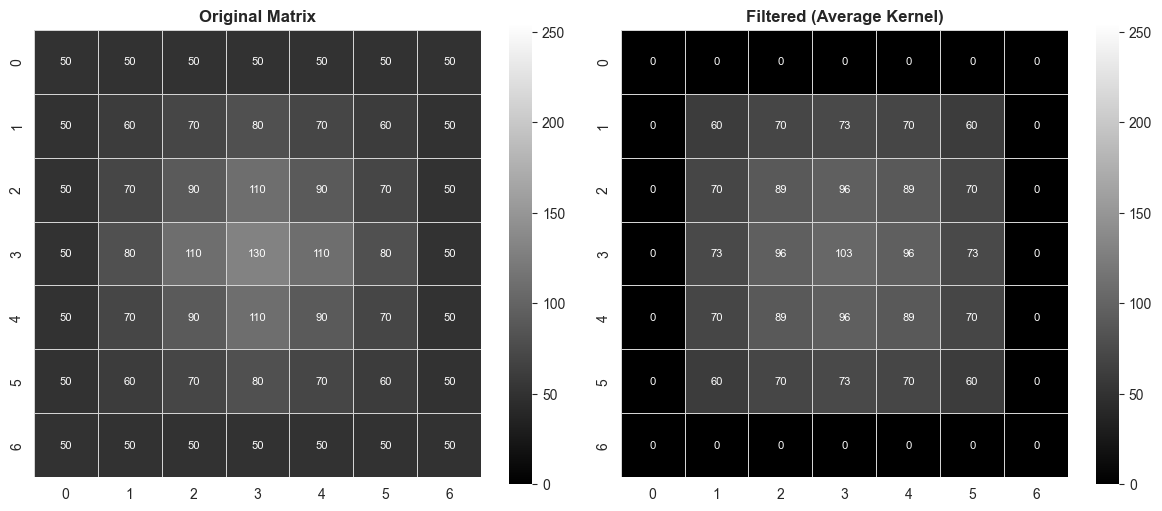

In [343]:
# Terapkan filter ke seluruh matrix pixel menggunakan konvolusi manual
img_height, img_width = pixel_matrix.shape
print(f"\nUkuran Matrix Pixel: {img_height}x{img_width}")
kernel_height, kernel_width = average_kernel.shape
print(f"Ukuran Kernel: {kernel_height}x{kernel_width}")

# Hitung padding yang dibutuhkan
pad_h = kernel_height // 2
pad_w = kernel_width // 2
print(f"Padding yang Dibutuhkan: Height={pad_h}, Width={pad_w}")

# Buat output matrix dengan ukuran yang sama dengan input
output = np.zeros_like(pixel_matrix)

# Lakukan konvolusi manual
for i in range(pad_h, img_height - pad_h):
    for j in range(pad_w, img_width - pad_w):
        # Ambil region of interest (ROI)
        roi = pixel_matrix[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
        
        # Element-wise multiplication dan sum
        output[i, j] = np.sum(roi * average_kernel)


# Original
# Create figure with seaborn style
sns.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original
sns.heatmap(pixel_matrix, annot=True, fmt='.0f', cmap='gray', cbar=True, 
            ax=axes[0], square=True, linewidths=0.5, linecolor='lightgray',
            vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
axes[0].set_title('Original Matrix', fontsize=12, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Filtered
sns.heatmap(output, annot=True, fmt='.0f', cmap='gray', cbar=True, 
            ax=axes[1], square=True, linewidths=0.5, linecolor='lightgray',
            vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
axes[1].set_title('Filtered (Average Kernel)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [344]:
def manual_convolution(image, kernel):
    """
    Melakukan konvolusi manual antara image dan kernel
    """
    # Ukuran image dan kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Hitung padding yang dibutuhkan
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    
    # Buat output matrix dengan ukuran yang sama dengan input
    output = np.zeros_like(image)
    
    # Lakukan konvolusi
    for i in range(pad_h, img_height - pad_h):
        for j in range(pad_w, img_width - pad_w):
            # Ambil region of interest (ROI)
            roi = image[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            
            # Element-wise multiplication dan sum
            output[i, j] = np.sum(roi * kernel)
    
    return output

def visualize_comparison(original, output):
    sns.set_style("white")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original
    sns.heatmap(original, annot=True, fmt='.0f', cmap='gray', cbar=True, 
                ax=axes[0], square=True, linewidths=0.5, linecolor='lightgray',
                vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
    axes[0].set_title('Original Matrix', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')

    # Filtered
    sns.heatmap(output, annot=True, fmt='.0f', cmap='gray', cbar=True, 
                ax=axes[1], square=True, linewidths=0.5, linecolor='lightgray',
                vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
    axes[1].set_title('Filtered (Average Kernel)', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

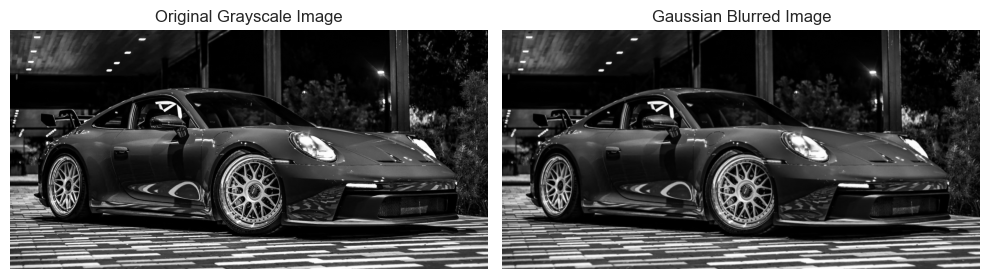

In [345]:
blurred_image = cv2.GaussianBlur(img_gray, (3, 3), 0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title("Gaussian Blurred Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

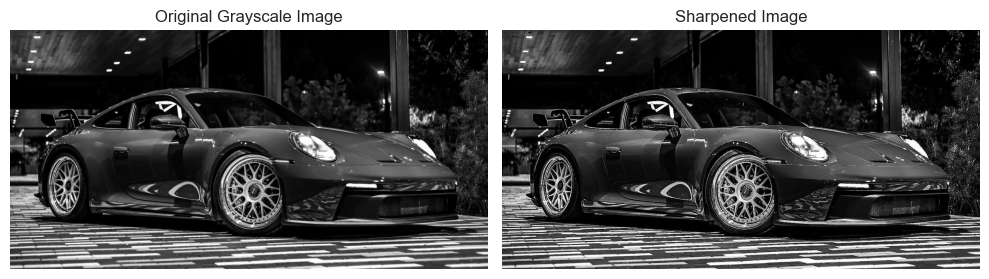

In [346]:
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened_image = cv2.filter2D(img_gray, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(sharpened_image, cmap='gray')
axes[1].set_title("Sharpened Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

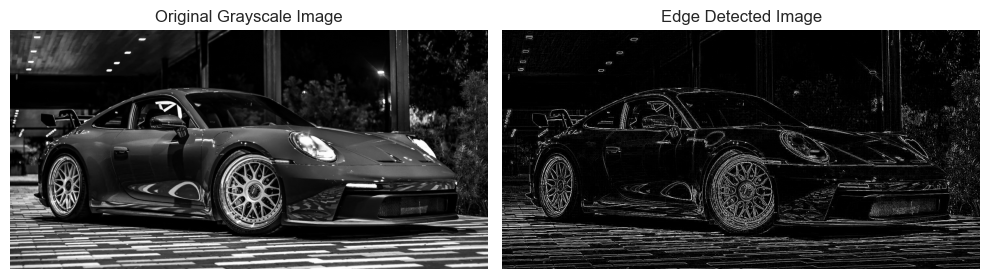

In [347]:
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
edge_detected_image = cv2.filter2D(img_gray, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(edge_detected_image, cmap='gray')
axes[1].set_title("Edge Detected Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

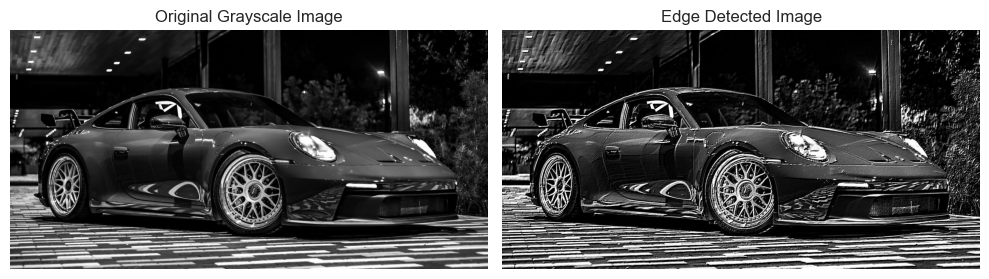

In [348]:
kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
edge_detected_image = cv2.filter2D(img_gray, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(edge_detected_image, cmap='gray')
axes[1].set_title("Edge Detected Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

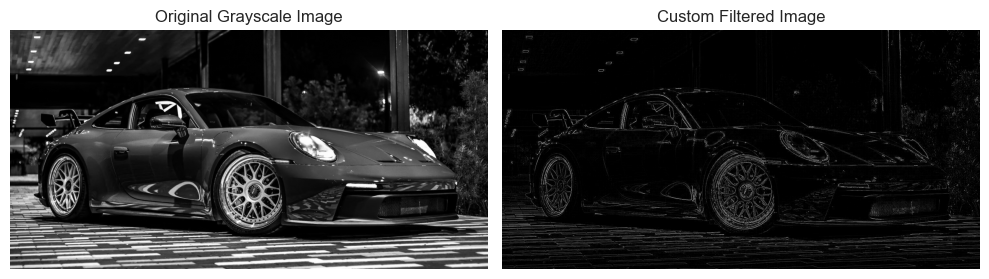

In [349]:
custom_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
custom_filtered = cv2.filter2D(img_gray, -1, custom_kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(custom_filtered, cmap='gray')
axes[1].set_title("Custom Filtered Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()